In [98]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)


In [99]:
data = pd.read_csv("adult.csv")

In [100]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
9,41,Private,70037,Some-college,10,Never-married,Craft-repair,Unmarried,White,Male,0,3004,60,?,>50K


In [101]:
data.shape

(32561, 15)

In [102]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [103]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [104]:
data.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status   
0       90         ?   77053       HS-grad              9             Widowed  \
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [105]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [106]:
data.duplicated().sum()

24

In [107]:
data.drop_duplicates(inplace=True)

In [108]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [109]:
categorical_features = data.select_dtypes(include="object").columns
numerical_features = data.select_dtypes(exclude="object").columns

In [110]:
categorical_features


Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [111]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

In [112]:
data["workclass"].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [54]:
# Checking unique values in categorical columns
for i in categorical_features:
    print(i, data[i].unique())
          
    print()
    print("------------------------------------------")
    print()
    

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

------------------------------------------

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

------------------------------------------

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

------------------------------------------

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

------------------------------------------

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife']

-------------------------------------

In [55]:
data['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [56]:
data['native.country'].value_counts()

native.country
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [57]:
# reomve ? and replace with mode value # . mode()
data['workclass']= data['workclass'].replace("?", "Private")
data["occupation"]= data['occupation'].replace("?", "Prof-specialty ")
data["native.country"] = data["native.country"].replace("?", "United-States")

In [58]:
data['native.country'].value_counts()

native.country
United-States                 29735
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

# Data Visualization

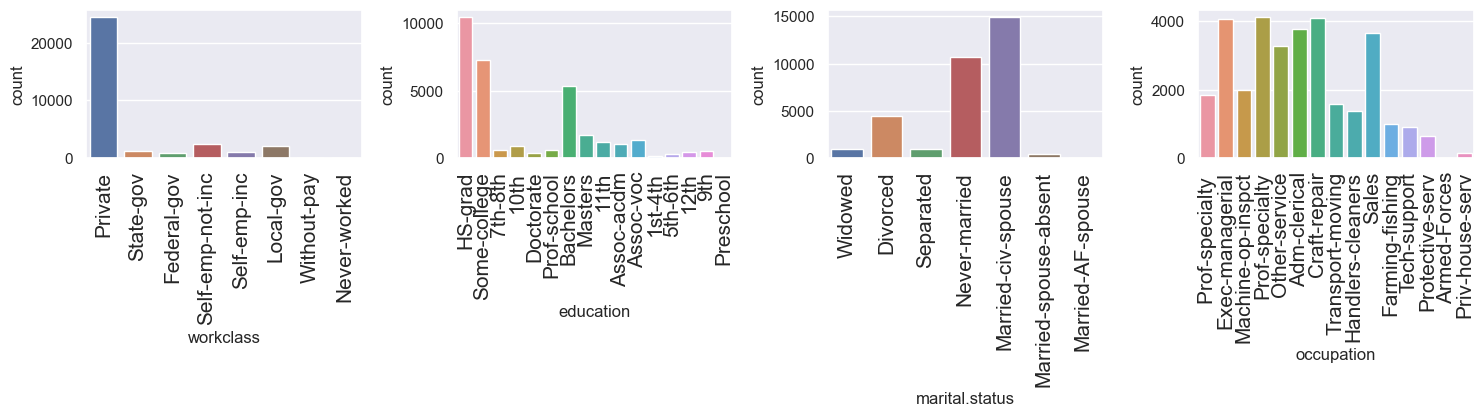

In [59]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})

columns1 = ['workclass','education', 'marital.status', 'occupation']

for i in range(0, len(columns1)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x =data[columns1[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

In [60]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

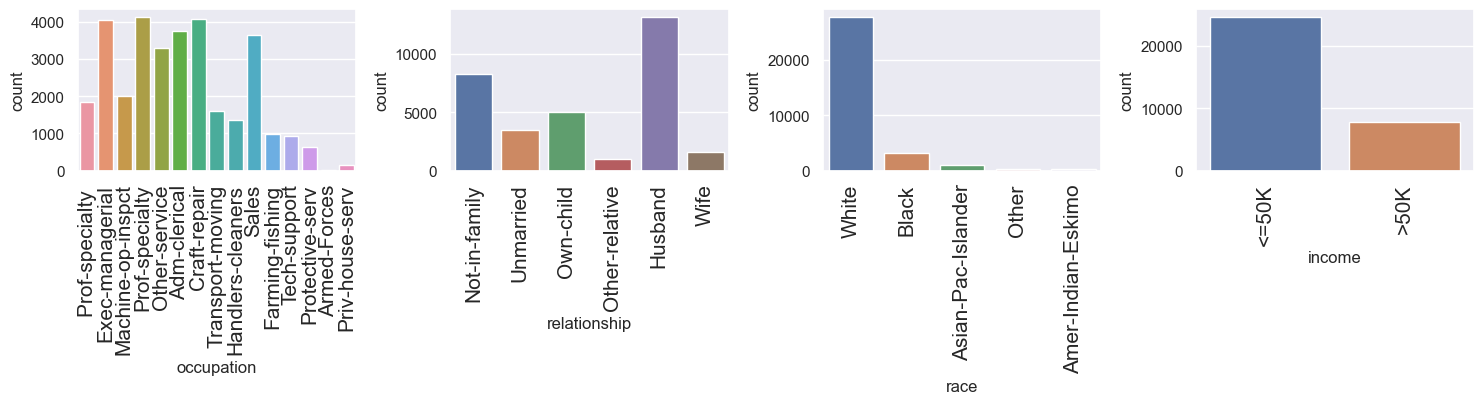

In [61]:
columns2 = ['occupation', 'relationship', 'race', 'income']

for i in range(0, len(columns2)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x =data[columns2[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

In [62]:
numerical_features

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')

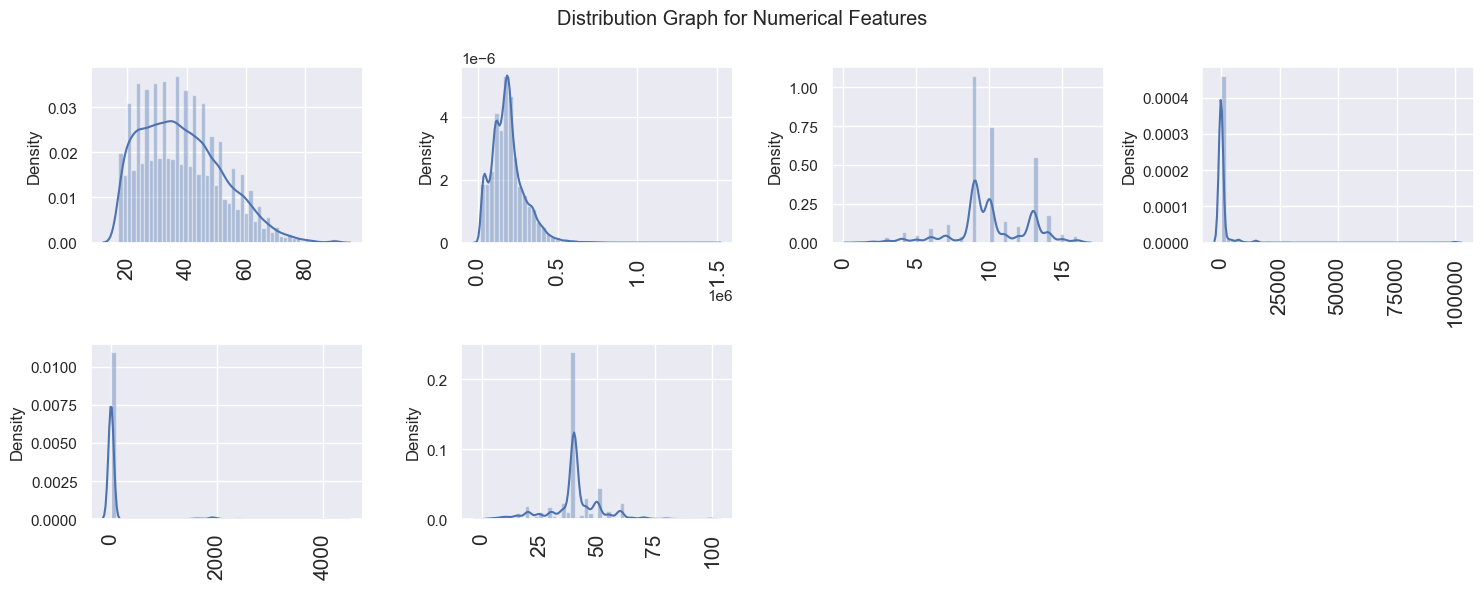

In [63]:
plt.suptitle("Distribution Graph for Numerical Features")
for i in range(0, len(numerical_features)):
    plt.subplot(2, 4, i+1)
    sns.distplot(x = data[numerical_features[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()
    

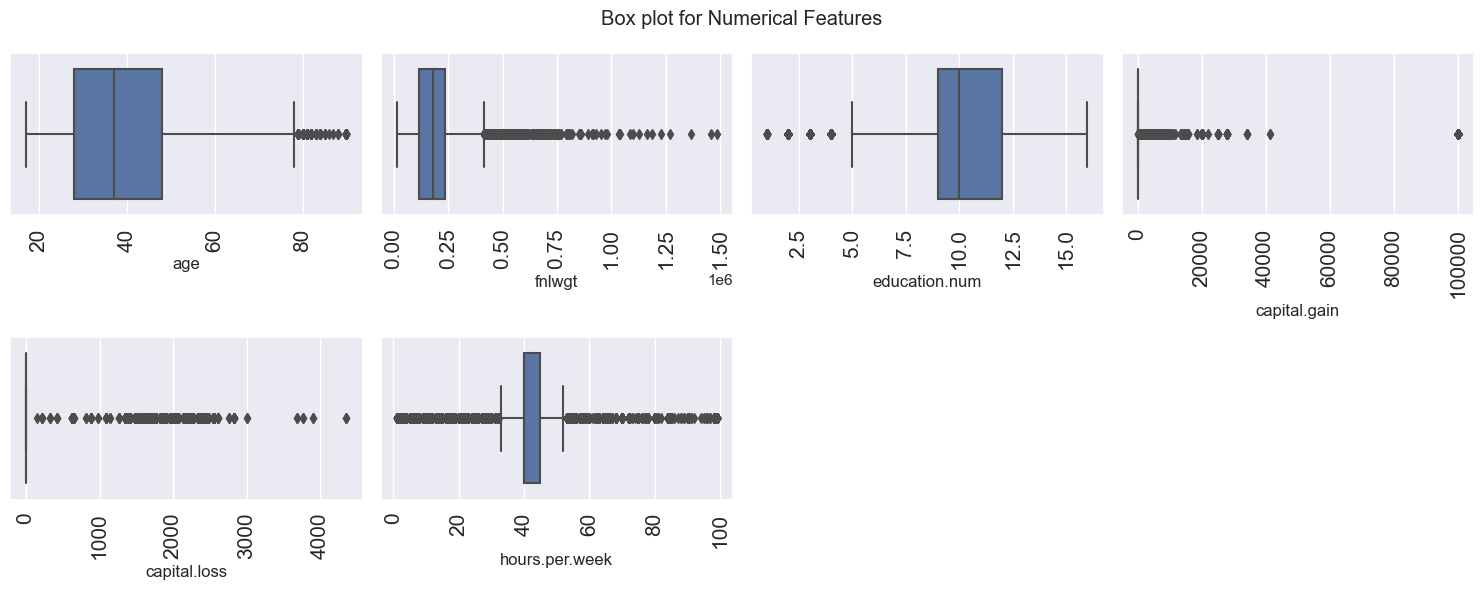

In [64]:
plt.suptitle("Box plot for Numerical Features")
for i in range(0, len(numerical_features)):
    plt.subplot(2, 4, i+1)
    sns.boxplot(x = data[numerical_features[i]])
    plt.xticks(size=15, rotation=90)
    plt.tight_layout()

<Axes: xlabel='income'>

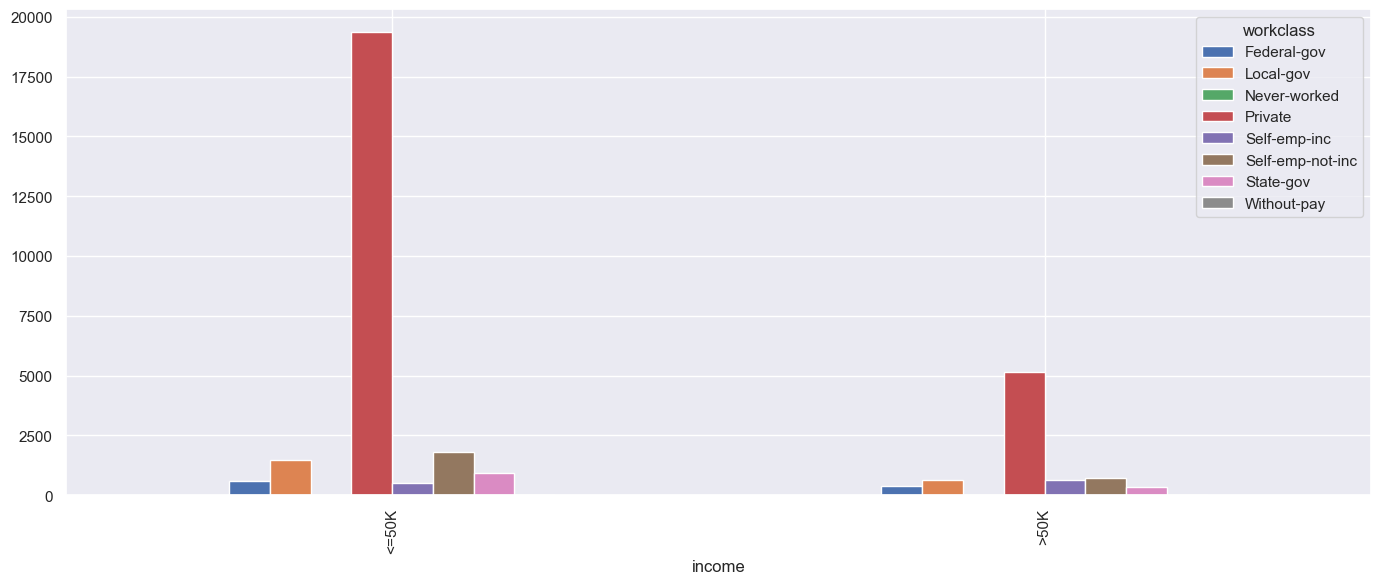

In [65]:
salary = pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

<Axes: xlabel='income'>

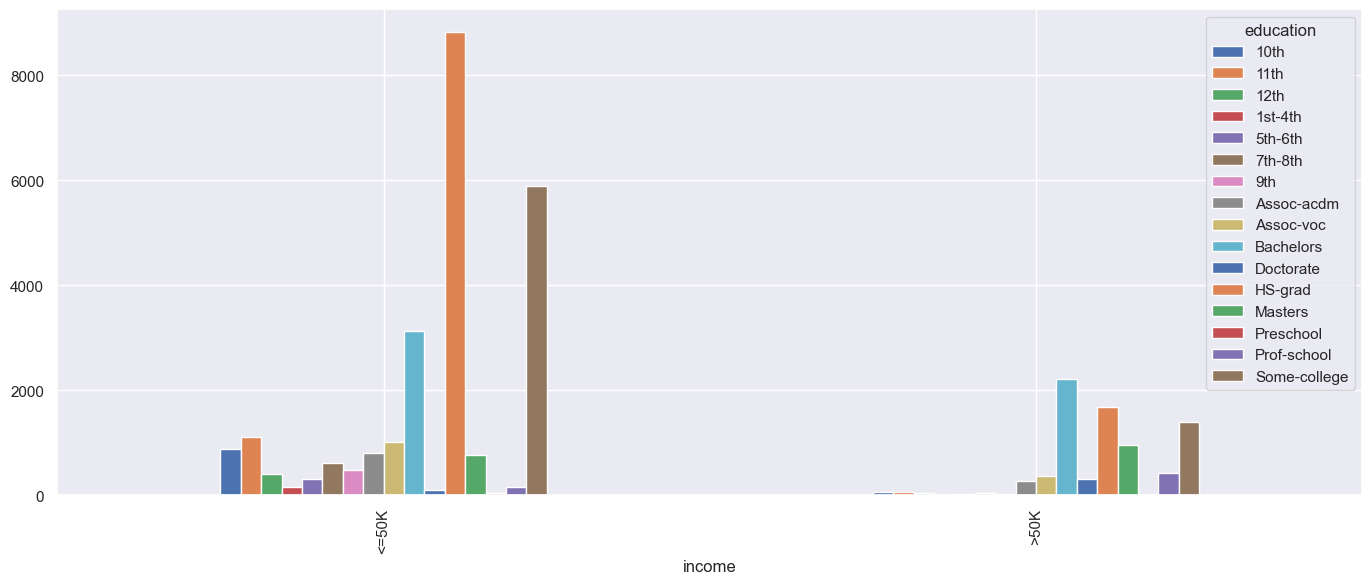

In [66]:
education = pd.crosstab(data['income'],data['education'])
education.plot(kind='bar')

<Axes: xlabel='income'>

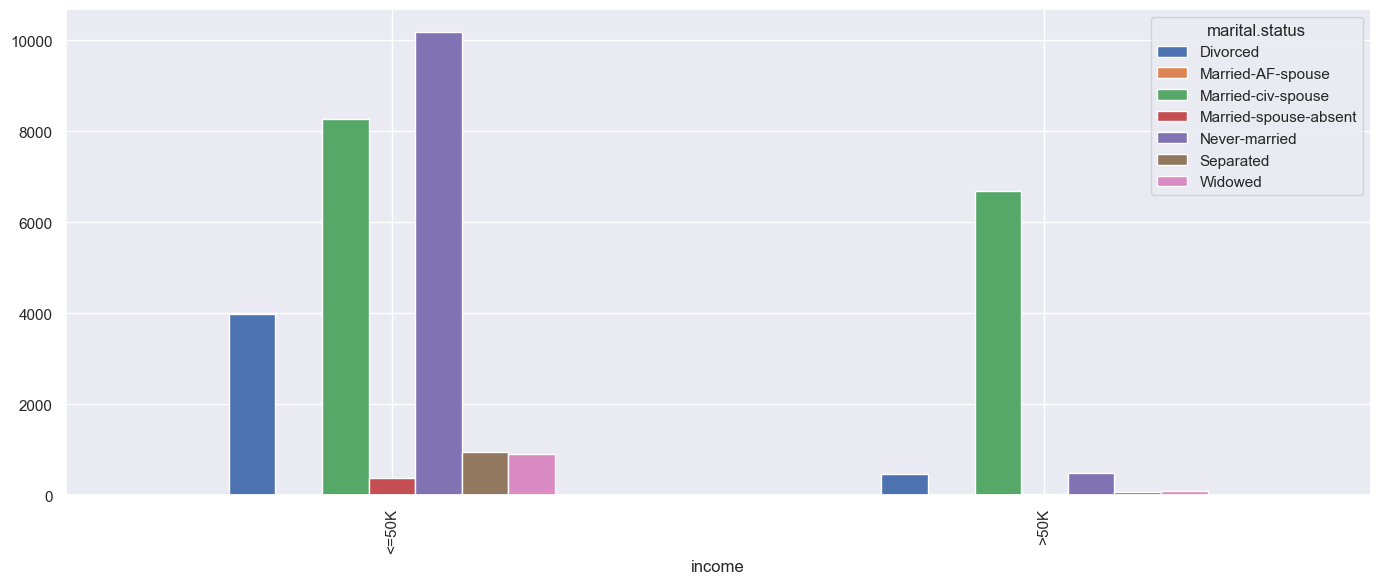

In [67]:
marital_status = pd.crosstab(data['income'], data['marital.status'])
marital_status.plot(kind='bar')

<Axes: xlabel='income'>

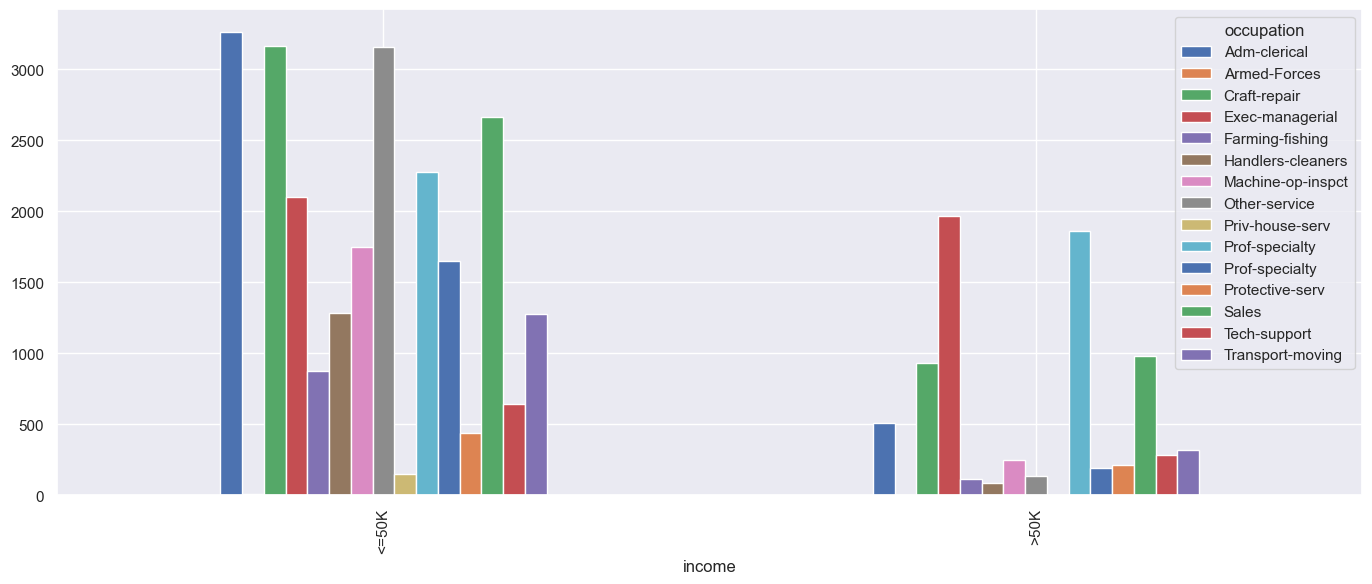

In [68]:
occupation = pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind='bar')

<Axes: xlabel='income'>

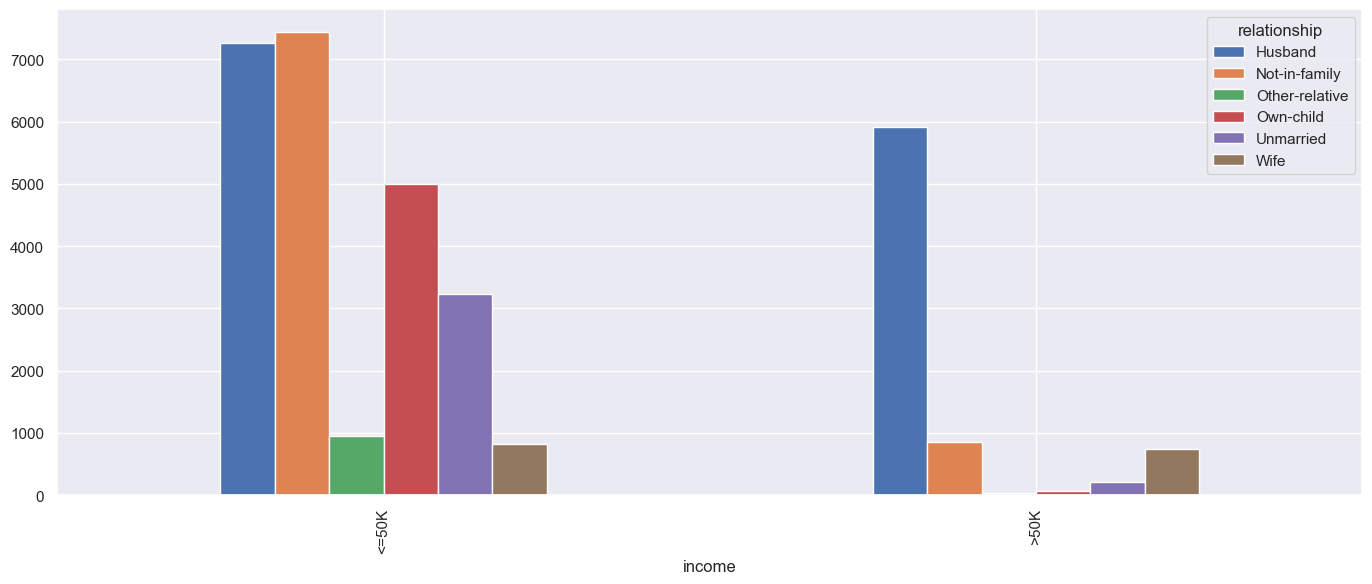

In [69]:
relationship = pd.crosstab(data['income'], data['relationship'])
relationship.plot(kind='bar')

<Axes: xlabel='income'>

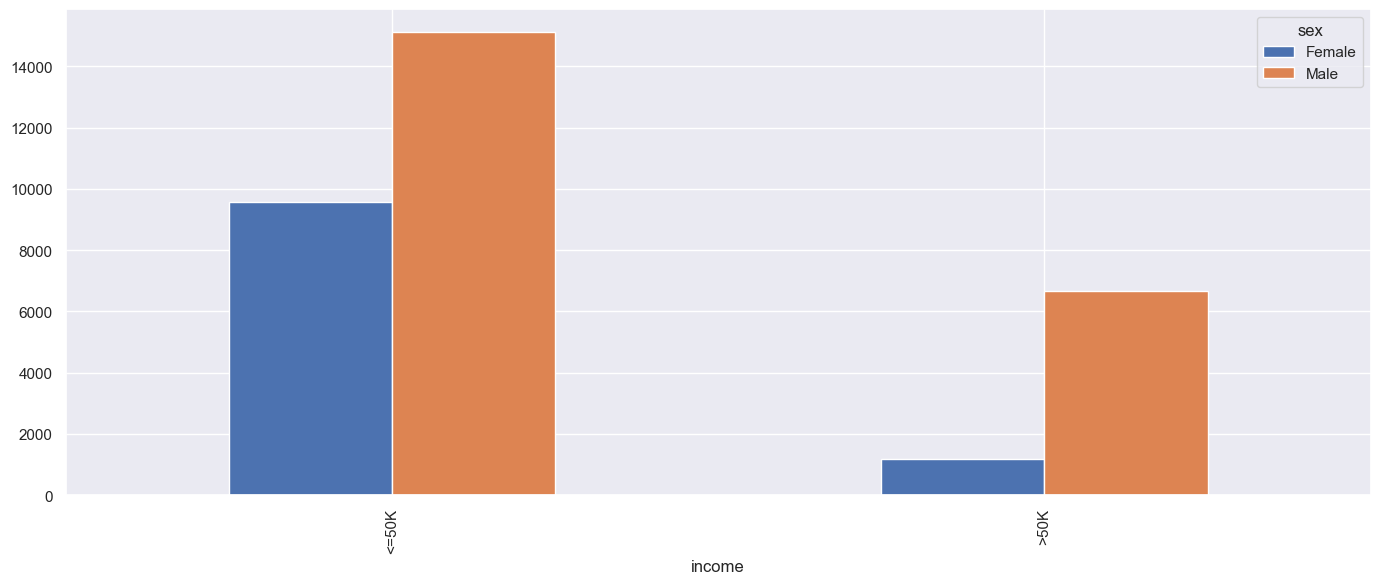

In [70]:
sex = pd.crosstab(data['income'], data['sex'])
sex.plot(kind='bar')

In [86]:
categorical_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [113]:
#encoding the categorical data

from sklearn.preprocessing import LabelEncoder

#creating object
le = LabelEncoder()

#define the categorical features
categorical_features =['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country']

#Loop through the categorical features and encode thgem
for features in categorical_features:
    le.fit(data[features])
    data[features] = le.transform(data[features])

In [115]:
data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,<=50K
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,<=50K


In [116]:
data['income'].value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [117]:
# Target Column
data['income'] = data['income'].map({'<=50K':0,'>50K':1})

In [119]:
data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,77053,11,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,132870,11,9,6,4,1,4,0,0,4356,18,39,0


In [120]:
data['income'].value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

<Axes: >

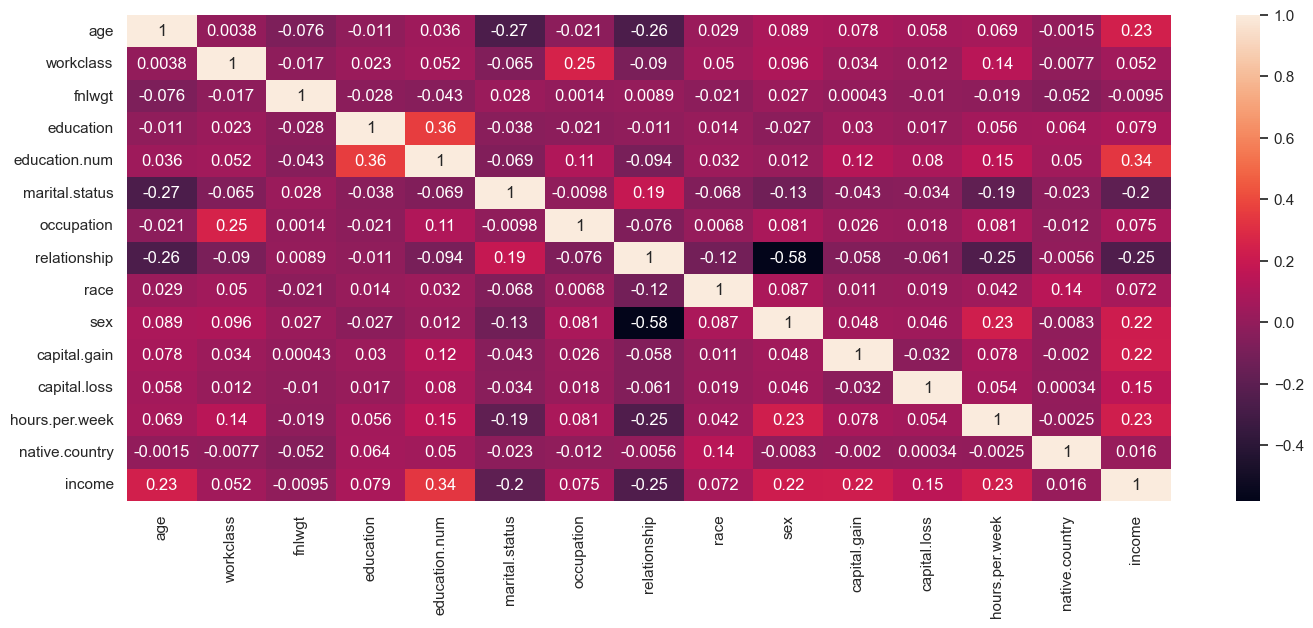

In [121]:
sns.heatmap(data.corr(),annot=True)

In [122]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [123]:
data.drop(['education','fnlwgt','education.num'],axis=1, inplace=True)

In [124]:
data.head(2)

,age,workclass,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,6,0,1,4,0,0,4356,40,39,0
1,82,4,6,4,1,4,0,0,4356,18,39,0


In [125]:
data.to_csv("cleaneddata.csv", index=False)

# Model Training

In [127]:
X =data.drop('income', axis = 1)
y = data['income']

In [129]:
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(exclude='object').columns
categorical_features


Index([], dtype='object')

In [130]:
numerical_features 

Index(['age', 'workclass', 'marital.status', 'occupation', 'relationship',
       'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week',
       'native.country'],
      dtype='object')

In [131]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [132]:
num_pipeline = Pipeline(
    steps =[
        ("imputer", SimpleImputer(strategy="median")),
        ('scaler', StandardScaler())
    ]
)
cate_pipeline = Pipeline(
    steps =[
        ("imputer",SimpleImputer(strategy="most_frequent")),
        ("scaler", StandardScaler())
    ]

)

preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerical_features)
])

In [133]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

In [134]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(26029, 11)
(6508, 11)
(26029,)
(6508,)


In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,f1_score,classification_report,ConfusionMatrixDisplay

In [136]:
def performance_metrices(test,predict):
    confusionmetrix = print(f"Confustion Matrix: { confusion_matrix(test,predict)}")

    precision = print(f"Precision Score is:{precision_score(test,predict)}")

    recall = print(f"Recall : {recall_score(test,predict)}")

    f1score = print(f"F1 Score: {f1_score(test,predict)}")

    accuracyscore = print(f"Accuracy Score : {accuracy_score(test,predict)}")

    return confusionmetrix,precision,recall,f1score,accuracyscore



# Hyperparameter Tuning

# Logistic Regression

In [137]:
lr = LogisticRegression()

In [141]:
param = {
    "class_weight":["balanced"],
    "penalty": ['l1','l2'],
    'C' : [0.001,0.01,0.1,1,10,100],
    "solver": ['liblinear','saga']

}

In [142]:
grid = GridSearchCV(estimator = lr,param_grid = param, cv = 5, n_jobs = -1, verbose =3 )

In [143]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [144]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [145]:
grid.score(X_train, y_train)

0.7794767374851128

In [146]:
y_pred = grid.predict(X_test)

In [147]:
accuracy_score(y_test,y_pred)

0.7811923786109404

# Decision Tree

In [148]:
dr = DecisionTreeClassifier()

In [152]:
param_grid = {
    'class_weight':["balanced"],
    'criterion': ['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth': [3,4,5,6],
    'min_samples_split':[2,3,4,5],
    'min_samples_leaf':[1,2,3],
    'max_features': ['auto','sqrt','log2']
}

In [153]:
grid_search = GridSearchCV(estimator=dr, param_grid=param_grid,cv=5,scoring="accuracy")

In [154]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [155]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'splitter': 'best'}

In [156]:
grid_search.score(X_train,y_train)

0.7749817511237466

In [157]:
y_pred1 = grid_search.predict(X_test)

In [158]:
accuracy_score(y_test, y_pred1)

0.7607559926244623

# Randon Forest Classifier

In [159]:
rf = RandomForestClassifier()

In [164]:
param_rf = {
    'class_weight':['balanced'],
    'n_estimators' : [20,50,30],
    'max_depth': [10,8,5],
    'min_samples_split':[2,5,10]
}

In [165]:
grid_rf = GridSearchCV(estimator=rf, param_grid= param_rf,cv=5, scoring = "accuracy")

In [166]:
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'], 'max_depth': [10, 8, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [167]:
grid_rf.best_params_

{'class_weight': 'balanced',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 20}

In [169]:
grid_rf.score(X_train,y_train)

0.8103269430250875

In [170]:
y_pred2 = grid_rf.predict(X_test)

In [171]:
accuracy_score(y_test,y_pred2)

0.7885679164105716

In [172]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4988
           1       0.53      0.86      0.66      1520

    accuracy                           0.79      6508
   macro avg       0.74      0.81      0.75      6508
weighted avg       0.85      0.79      0.80      6508



In [174]:
print(confusion_matrix(y_test, y_pred2))

[[3819 1169]
 [ 207 1313]]
